In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV,train_test_split,KFold
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss,roc_auc_score
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
Dataset = pd.read_csv("Dataset_male.csv")

In [3]:
display(Dataset)

,ID,Name,Last_Name,Sex,Age,Menopause_age,Tscore_Hip_total,CRP,Cr,ALP,...,Tscore_Hip_neck,Zscore_Hip_neck,BMI,Pregnancy_Count,Histroy_Anticoagulant,Active_Smoking,History_Smoking,Calcium_Supplement,History_Diabetes_2,Refracture
0,390,منوچهر,باقریان,1,63,,-0.2,5,1,90,...,-1.5,0.5,40.8,,0,0,0,0,0,0
1,1136,حسن,مقیم زاده,1,69,,-0.5,,,,...,-1.4,-0.3,40,,0,0,0,0,0,1
2,615,محمدعلی,قلعه,1,60,,1.1,10,0.8,142,...,-1.8,-0.8,38.2,,0,1,1,0,0,0
3,155,جعفر,خانی,1,59,,-0.4,14,0.7,202,...,-2,-1.1,38.1,,1,1,1,0,1,1
4,1429,محمود,خان بابا زاده,1,50,,1.5,1,1.2,146,...,0.7,1.5,36.1,,,,0,0,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,432,محمد رضا,رمضانی,1,58,,0,3,3,246,...,-1.1,0,24.4,,0,0,0,,0,0
384,1114,سبز علی,بکیای سای افشار,1,59,,,5,0.8,141,...,,,,,1,,,,,0
385,1108,احمد,عبدالخالق,1,64,,,6,0.9,143,...,,,,,0,,,,,0
386,1104,عباس,شیرازی,1,62,,-3,10,1.2,202,...,-2.9,-1.9,,,0,,,,,1


In [4]:
Dataset.drop("Name", axis = 1, inplace=True)
Dataset.drop("Last_Name", axis = 1, inplace=True)
Dataset.replace(r'\s+', np.nan, regex=True, inplace=True)

In [5]:
display(Dataset)

,ID,Sex,Age,Menopause_age,Tscore_Hip_total,CRP,Cr,ALP,BUN,P,...,Tscore_Hip_neck,Zscore_Hip_neck,BMI,Pregnancy_Count,Histroy_Anticoagulant,Active_Smoking,History_Smoking,Calcium_Supplement,History_Diabetes_2,Refracture
0,390,1,63,NaN,-0.2,5,1,90,16,4,...,-1.5,0.5,40.8,NaN,0,0,0,0,0,0
1,1136,1,69,NaN,-0.5,NaN,NaN,NaN,NaN,NaN,...,-1.4,-0.3,40,NaN,0,0,0,0,0,1
2,615,1,60,NaN,1.1,10,0.8,142,17,3.7,...,-1.8,-0.8,38.2,NaN,0,1,1,0,0,0
3,155,1,59,NaN,-0.4,14,0.7,202,17,4.2,...,-2,-1.1,38.1,NaN,1,1,1,0,1,1
4,1429,1,50,NaN,1.5,1,1.2,146,14,3,...,0.7,1.5,36.1,NaN,NaN,NaN,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,432,1,58,NaN,0,3,3,246,28,4.1,...,-1.1,0,24.4,NaN,0,0,0,NaN,0,0
384,1114,1,59,NaN,NaN,5,0.8,141,14,3.8,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0
385,1108,1,64,NaN,NaN,6,0.9,143,14,4.5,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
386,1104,1,62,NaN,-3,10,1.2,202,17,4.5,...,-2.9,-1.9,NaN,NaN,0,NaN,NaN,NaN,NaN,1


In [6]:
Dataset.isnull().sum()

ID                         0
Sex                        0
Age                        0
Menopause_age            388
Tscore_Hip_total          49
CRP                       13
Cr                        13
ALP                       18
BUN                       17
P                         22
Ca                        20
PTH                       66
Vit_D3                    38
BMD_vertebra              46
Tscore_vertebra           47
Zscore_vertebra           48
BMD_Hip_total             48
Zscore_hip_total          48
BMD_Hip_Neck              44
Tscore_Hip_neck           44
Zscore_Hip_neck           44
BMI                        4
Pregnancy_Count          388
Histroy_Anticoagulant     65
Active_Smoking            46
History_Smoking           16
Calcium_Supplement        14
History_Diabetes_2        65
Refracture                 0
dtype: int64

In [7]:
print('Percent of missing "Tscore_Hip_total" records is %.2f%%' %((Dataset['Tscore_Hip_total'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "CRP" records is %.2f%%' %((Dataset['CRP'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Cr" records is %.2f%%' %((Dataset['Cr'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "ALP" records is %.2f%%' %((Dataset['ALP'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "BUN" records is %.2f%%' %((Dataset['BUN'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "P" records is %.2f%%' %((Dataset['P'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Ca" records is %.2f%%' %((Dataset['Ca'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "PTH" records is %.2f%%' %((Dataset['PTH'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Vit_D3" records is %.2f%%' %((Dataset['Vit_D3'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "BMD_vertebra" records is %.2f%%' %((Dataset['BMD_vertebra'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Tscore_vertebra" records is %.2f%%' %((Dataset['Tscore_vertebra'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Zscore_vertebra" records is %.2f%%' %((Dataset['Zscore_vertebra'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "BMD_Hip_total" records is %.2f%%' %((Dataset['BMD_Hip_total'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Zscore_hip_total" records is %.2f%%' %((Dataset['Zscore_hip_total'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "BMD_Hip_Neck" records is %.2f%%' %((Dataset['BMD_Hip_Neck'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Tscore_Hip_neck" records is %.2f%%' %((Dataset['Tscore_Hip_neck'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Zscore_Hip_neck" records is %.2f%%' %((Dataset['Zscore_Hip_neck'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "BMI" records is %.2f%%' %((Dataset['BMI'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Histroy_Anticoagulant" records is %.2f%%' %((Dataset['Histroy_Anticoagulant'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Active_Smoking" records is %.2f%%' %((Dataset['Active_Smoking'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "History_Smoking" records is %.2f%%' %((Dataset['History_Smoking'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "Calcium_Supplement" records is %.2f%%' %((Dataset['Calcium_Supplement'].isnull().sum()/Dataset.shape[0])*100))
print('Percent of missing "History_Diabetes_2" records is %.2f%%' %((Dataset['History_Diabetes_2'].isnull().sum()/Dataset.shape[0])*100))

Percent of missing "Tscore_Hip_total" records is 12.63%
Percent of missing "CRP" records is 3.35%
Percent of missing "Cr" records is 3.35%
Percent of missing "ALP" records is 4.64%
Percent of missing "BUN" records is 4.38%
Percent of missing "P" records is 5.67%
Percent of missing "Ca" records is 5.15%
Percent of missing "PTH" records is 17.01%
Percent of missing "Vit_D3" records is 9.79%
Percent of missing "BMD_vertebra" records is 11.86%
Percent of missing "Tscore_vertebra" records is 12.11%
Percent of missing "Zscore_vertebra" records is 12.37%
Percent of missing "BMD_Hip_total" records is 12.37%
Percent of missing "Zscore_hip_total" records is 12.37%
Percent of missing "BMD_Hip_Neck" records is 11.34%
Percent of missing "Tscore_Hip_neck" records is 11.34%
Percent of missing "Zscore_Hip_neck" records is 11.34%
Percent of missing "BMI" records is 1.03%
Percent of missing "Histroy_Anticoagulant" records is 16.75%
Percent of missing "Active_Smoking" records is 11.86%
Percent of missing

1    388
Name: Sex, dtype: int64


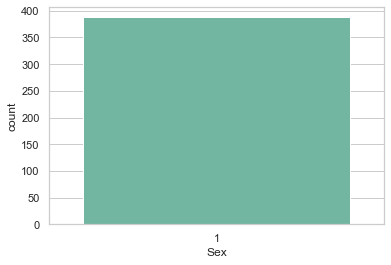

In [7]:
#Visualizing the distribution of variables
print(Dataset['Sex'].value_counts())
sns.countplot(x='Sex', data=Dataset, palette='Set2')
plt.show()

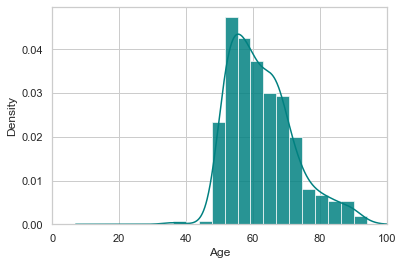

In [8]:
#Visualizing the distribution of variables
ax = Dataset["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(0,100)
plt.show()

In [9]:
Dataset.dtypes

ID                         int64
Sex                        int64
Age                        int64
Menopause_age            float64
Tscore_Hip_total          object
CRP                       object
Cr                        object
ALP                       object
BUN                       object
P                         object
Ca                        object
PTH                       object
Vit_D3                    object
BMD_vertebra              object
Tscore_vertebra           object
Zscore_vertebra           object
BMD_Hip_total             object
Zscore_hip_total          object
BMD_Hip_Neck              object
Tscore_Hip_neck           object
Zscore_Hip_neck           object
BMI                       object
Pregnancy_Count          float64
Histroy_Anticoagulant     object
Active_Smoking            object
History_Smoking           object
Calcium_Supplement        object
History_Diabetes_2        object
Refracture                 int64
dtype: object

In [10]:
Dataset["Menopause_age"] = Dataset["Menopause_age"].astype("float")
Dataset["Tscore_Hip_total"] = Dataset["Tscore_Hip_total"].astype("float")
Dataset["CRP"] = Dataset["CRP"].astype("float")
Dataset["Cr"] = Dataset["Cr"].astype("float")
Dataset["ALP"] = Dataset["ALP"].astype("float")
Dataset["BUN"] = Dataset["BUN"].astype("float")
Dataset["P"] = Dataset["P"].astype("float")
Dataset["Ca"] = Dataset["Ca"].astype("float")
Dataset["PTH"] = Dataset["PTH"].astype("float")
Dataset["Vit_D3"] = Dataset["Vit_D3"].astype("float")
Dataset["BMD_vertebra"] = Dataset["BMD_vertebra"].astype("float")
Dataset["Tscore_vertebra"] = Dataset["Tscore_vertebra"].astype("float")
Dataset["Zscore_vertebra"] = Dataset["Zscore_vertebra"].astype("float")
Dataset["BMD_Hip_total"] = Dataset["BMD_Hip_total"].astype("float")
Dataset["Zscore_hip_total"] = Dataset["Zscore_hip_total"].astype("float")
Dataset["BMD_Hip_Neck"] = Dataset["BMD_Hip_Neck"].astype("float")
Dataset["Tscore_Hip_neck"] = Dataset["Tscore_Hip_neck"].astype("float")
Dataset["Zscore_Hip_neck"] = Dataset["Zscore_Hip_neck"].astype("float")
Dataset["BMI"] = Dataset["BMI"].astype("float")
Dataset["Pregnancy_Count"] = Dataset["Pregnancy_Count"].astype("float")

In [11]:
Dataset.dtypes

ID                         int64
Sex                        int64
Age                        int64
Menopause_age            float64
Tscore_Hip_total         float64
CRP                      float64
Cr                       float64
ALP                      float64
BUN                      float64
P                        float64
Ca                       float64
PTH                      float64
Vit_D3                   float64
BMD_vertebra             float64
Tscore_vertebra          float64
Zscore_vertebra          float64
BMD_Hip_total            float64
Zscore_hip_total         float64
BMD_Hip_Neck             float64
Tscore_Hip_neck          float64
Zscore_Hip_neck          float64
BMI                      float64
Pregnancy_Count          float64
Histroy_Anticoagulant     object
Active_Smoking            object
History_Smoking           object
Calcium_Supplement        object
History_Diabetes_2        object
Refracture                 int64
dtype: object

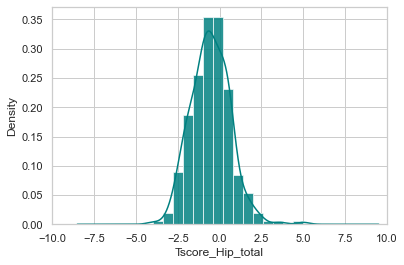

In [12]:
#Visualizing the distribution of variables
ax = Dataset["Tscore_Hip_total"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Tscore_Hip_total"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Tscore_Hip_total"].plot(kind='density', color='teal')
ax.set(xlabel='Tscore_Hip_total')
plt.xlim(-10,10)
plt.show()

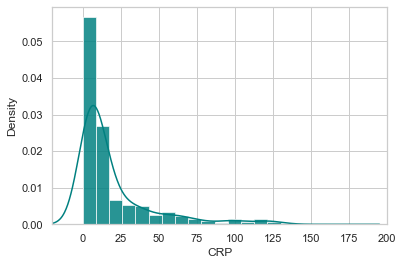

In [13]:
#Visualizing the distribution of variables
ax = Dataset["CRP"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["CRP"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["CRP"].plot(kind='density', color='teal')
ax.set(xlabel='CRP')
plt.xlim(-20,200)
plt.show()

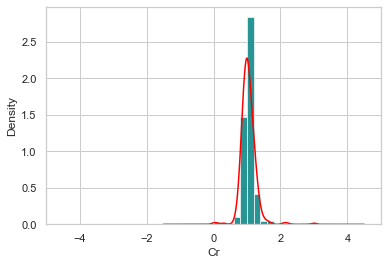

In [14]:
#Visualizing the distribution of variables
ax = Dataset["Cr"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Cr"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Cr"].plot(kind='density', color='red')
ax.set(xlabel='Cr')
plt.xlim(-5,5)
plt.show()

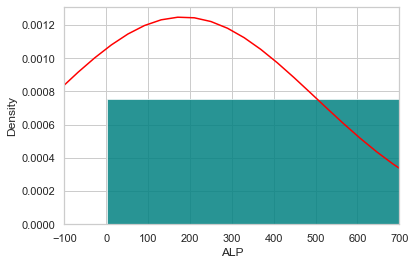

In [15]:
#Visualizing the distribution of variables
ax = Dataset["ALP"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["ALP"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["ALP"].plot(kind='density', color='red')
ax.set(xlabel='ALP')
plt.xlim(-100,700)
plt.show()

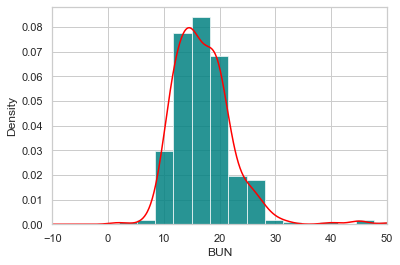

In [16]:
#Visualizing the distribution of variables
ax = Dataset["BUN"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["BUN"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["BUN"].plot(kind='density', color='red')
ax.set(xlabel='BUN')
plt.xlim(-10,50)
plt.show()

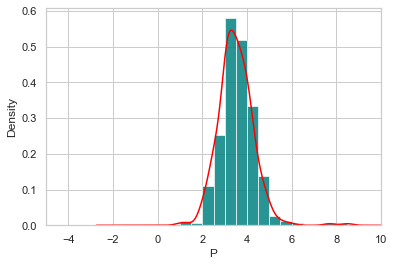

In [17]:
#Visualizing the distribution of variables
ax = Dataset["P"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["P"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["P"].plot(kind='density', color='red')
ax.set(xlabel='P')
plt.xlim(-5,10)
plt.show()

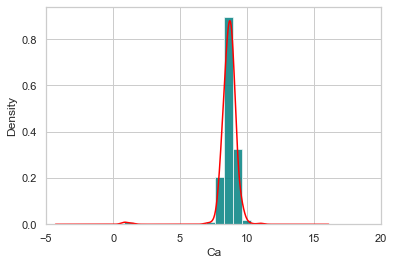

In [18]:
#Visualizing the distribution of variables
ax = Dataset["Ca"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Ca"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Ca"].plot(kind='density', color='red')
ax.set(xlabel='Ca')
plt.xlim(-5,20)
plt.show()

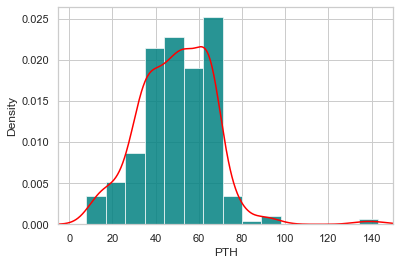

In [19]:
#Visualizing the distribution of variables
ax = Dataset["PTH"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["PTH"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["PTH"].plot(kind='density', color='red')
ax.set(xlabel='PTH')
plt.xlim(-5,150)
plt.show()

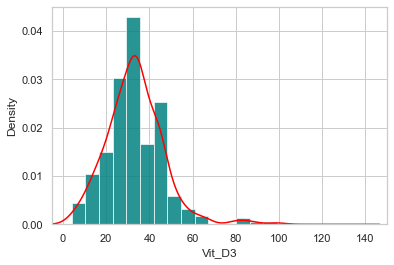

In [20]:
#Visualizing the distribution of variables
ax = Dataset["Vit_D3"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Vit_D3"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Vit_D3"].plot(kind='density', color='red')
ax.set(xlabel='Vit_D3')
plt.xlim(-5,150)
plt.show()

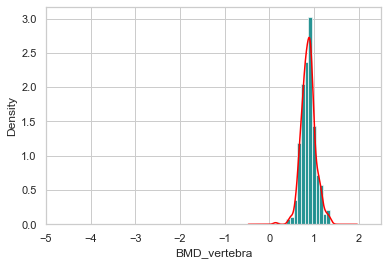

In [21]:
#Visualizing the distribution of variables
ax = Dataset["BMD_vertebra"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["BMD_vertebra"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["BMD_vertebra"].plot(kind='density', color='red')
ax.set(xlabel='BMD_vertebra')
plt.xlim(-5,2.5)
plt.show()

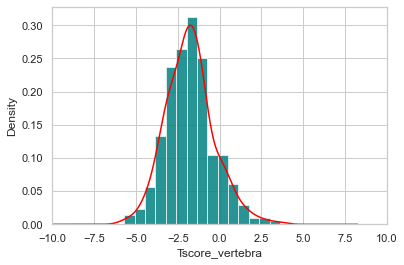

In [22]:
#Visualizing the distribution of variables
ax = Dataset["Tscore_vertebra"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Tscore_vertebra"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Tscore_vertebra"].plot(kind='density', color='red')
ax.set(xlabel='Tscore_vertebra')
plt.xlim(-10,10)
plt.show()

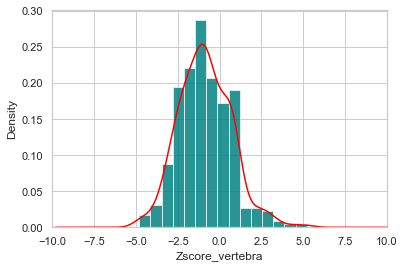

In [23]:
#Visualizing the distribution of variables
ax = Dataset["Zscore_vertebra"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Zscore_vertebra"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Zscore_vertebra"].plot(kind='density', color='red')
ax.set(xlabel='Zscore_vertebra')
plt.xlim(-10,10)
plt.show()

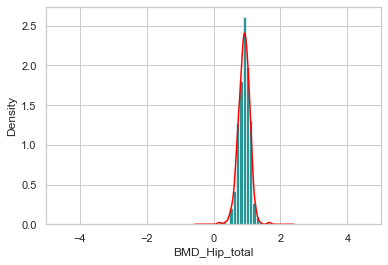

In [24]:
#Visualizing the distribution of variables
ax = Dataset["BMD_Hip_total"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["BMD_Hip_total"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["BMD_Hip_total"].plot(kind='density', color='red')
ax.set(xlabel='BMD_Hip_total')
plt.xlim(-5,5)
plt.show()

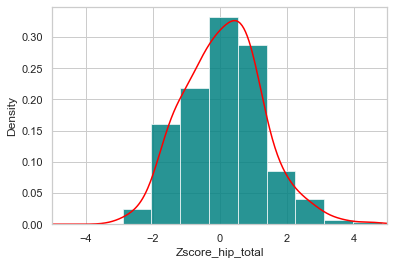

In [25]:
#Visualizing the distribution of variables
ax = Dataset["Zscore_hip_total"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Zscore_hip_total"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Zscore_hip_total"].plot(kind='density', color='red')
ax.set(xlabel='Zscore_hip_total')
plt.xlim(-5,5)
plt.show()

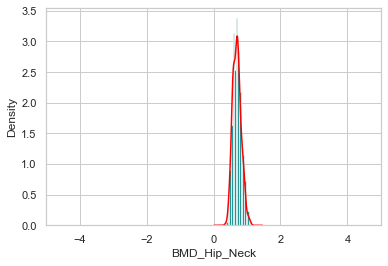

In [26]:
#Visualizing the distribution of variables
ax = Dataset["BMD_Hip_Neck"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["BMD_Hip_Neck"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["BMD_Hip_Neck"].plot(kind='density', color='red')
ax.set(xlabel='BMD_Hip_Neck')
plt.xlim(-5,5)
plt.show()

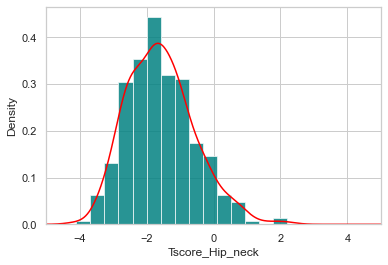

In [27]:
#Visualizing the distribution of variables
ax = Dataset["Tscore_Hip_neck"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Tscore_Hip_neck"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Tscore_Hip_neck"].plot(kind='density', color='red')
ax.set(xlabel='Tscore_Hip_neck')
plt.xlim(-5,5)
plt.show()

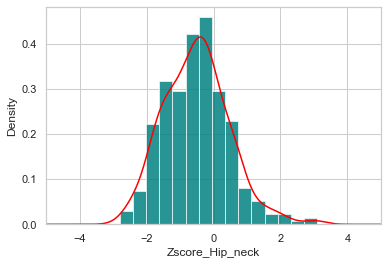

In [28]:
#Visualizing the distribution of variables
ax = Dataset["Zscore_Hip_neck"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["Zscore_Hip_neck"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["Zscore_Hip_neck"].plot(kind='density', color='red')
ax.set(xlabel='Zscore_Hip_neck')
plt.xlim(-5,5)
plt.show()

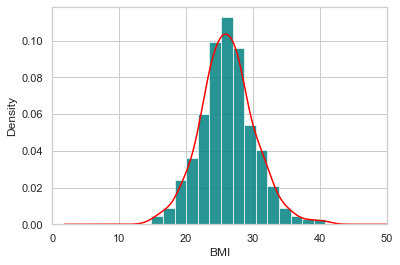

In [29]:
#Visualizing the distribution of variables
ax = Dataset["BMI"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax = Dataset["BMI"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
Dataset["BMI"].plot(kind='density', color='red')
ax.set(xlabel='BMI')
plt.xlim(0,50)
plt.show()

0    274
1     49
Name: Histroy_Anticoagulant, dtype: int64


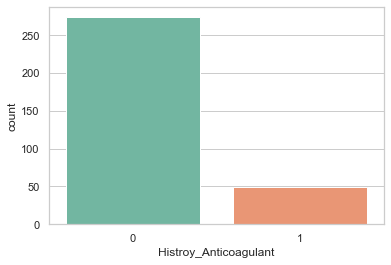

In [30]:
#Visualizing the distribution of variables
print(Dataset['Histroy_Anticoagulant'].value_counts())
sns.countplot(x='Histroy_Anticoagulant', data=Dataset, palette='Set2')
plt.show()

0    184
1    158
Name: Active_Smoking, dtype: int64


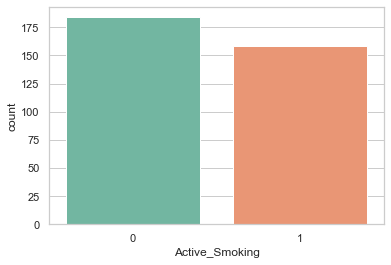

In [31]:
#Visualizing the distribution of variables
print(Dataset['Active_Smoking'].value_counts())
sns.countplot(x='Active_Smoking', data=Dataset, palette='Set2')
plt.show()

1    202
0    170
Name: History_Smoking, dtype: int64


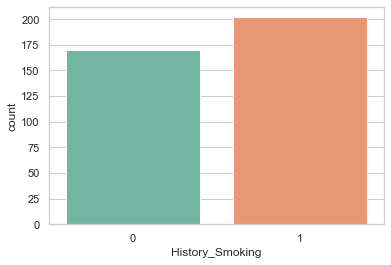

In [32]:
#Visualizing the distribution of variables
print(Dataset['History_Smoking'].value_counts())
sns.countplot(x='History_Smoking', data=Dataset, palette='Set2')
plt.show()

0    263
1     60
Name: History_Diabetes_2, dtype: int64


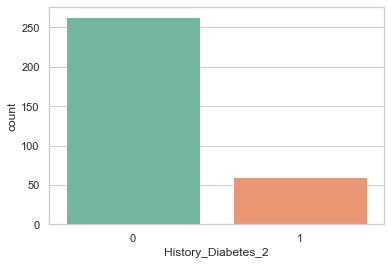

In [33]:
#Visualizing the distribution of variables
print(Dataset['History_Diabetes_2'].value_counts())
sns.countplot(x='History_Diabetes_2', data=Dataset, palette='Set2')
plt.show()

0    344
1     30
Name: Calcium_Supplement, dtype: int64


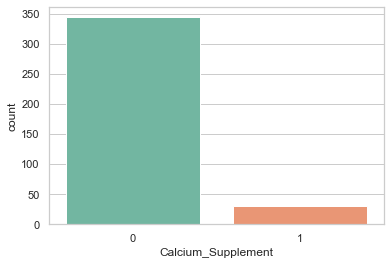

In [34]:
#Visualizing the distribution of variables
print(Dataset['Calcium_Supplement'].value_counts())
sns.countplot(x='Calcium_Supplement', data=Dataset, palette='Set2')
plt.show()

In [35]:
Dataset.columns

Index(['ID', 'Sex', 'Age', 'Menopause_age', 'Tscore_Hip_total', 'CRP', 'Cr',
       'ALP', 'BUN', 'P', 'Ca', 'PTH', 'Vit_D3', 'BMD_vertebra',
       'Tscore_vertebra', 'Zscore_vertebra', 'BMD_Hip_total',
       'Zscore_hip_total', 'BMD_Hip_Neck', 'Tscore_Hip_neck',
       'Zscore_Hip_neck', 'BMI', 'Pregnancy_Count', 'Histroy_Anticoagulant',
       'Active_Smoking', 'History_Smoking', 'Calcium_Supplement',
       'History_Diabetes_2', 'Refracture'],
      dtype='object')

In [36]:
Dataset['Tscore_Hip_total'].fillna(Dataset["Tscore_Hip_total"].mean(skipna=True), inplace=True)
Dataset['CRP'].fillna(Dataset["CRP"].median(skipna=True), inplace=True)
Dataset['Cr'].fillna(Dataset["Cr"].mean(skipna=True), inplace=True)
Dataset['ALP'].fillna(Dataset["ALP"].mean(skipna=True), inplace=True)
Dataset['BUN'].fillna(Dataset["BUN"].mean(skipna=True), inplace=True)
Dataset['P'].fillna(Dataset["P"].mean(skipna=True), inplace=True)
Dataset['Ca'].fillna(Dataset["Ca"].mean(skipna=True), inplace=True)
Dataset['PTH'].fillna(Dataset["PTH"].median(skipna=True), inplace=True)
Dataset['Vit_D3'].fillna(Dataset["Vit_D3"].mean(skipna=True), inplace=True)
Dataset['BMD_vertebra'].fillna(Dataset["BMD_vertebra"].mean(skipna=True), inplace=True)
Dataset['Tscore_vertebra'].fillna(Dataset["Tscore_vertebra"].mean(skipna=True), inplace=True)
Dataset['Zscore_vertebra'].fillna(Dataset["Zscore_vertebra"].mean(skipna=True), inplace=True)
Dataset['BMD_Hip_total'].fillna(Dataset["BMD_Hip_total"].mean(skipna=True), inplace=True)
Dataset['Zscore_hip_total'].fillna(Dataset["Zscore_hip_total"].median(skipna=True), inplace=True)
Dataset['BMD_Hip_Neck'].fillna(Dataset["BMD_Hip_Neck"].mean(skipna=True), inplace=True)
Dataset['Tscore_Hip_neck'].fillna(Dataset["Tscore_Hip_neck"].mean(skipna=True), inplace=True)
Dataset['Zscore_Hip_neck'].fillna(Dataset["Zscore_Hip_neck"].mean(skipna=True), inplace=True)
Dataset['BMI'].fillna(Dataset["BMI"].mean(skipna=True), inplace=True)
Dataset['Histroy_Anticoagulant'].fillna(0, inplace=True)
Dataset['Active_Smoking'].fillna(0, inplace=True)
Dataset['History_Smoking'].fillna(0, inplace=True)
Dataset['Calcium_Supplement'].fillna(0, inplace=True)
Dataset['History_Diabetes_2'].fillna(0, inplace=True)

In [37]:
Dataset.drop("Menopause_age", axis=1, inplace=True)
Dataset.drop("Pregnancy_Count", axis=1, inplace=True)
Dataset.drop("ID", axis=1, inplace=True)
Dataset.drop("Sex", axis=1, inplace=True)
Dataset.isnull().sum()

Age                      0
Tscore_Hip_total         0
CRP                      0
Cr                       0
ALP                      0
BUN                      0
P                        0
Ca                       0
PTH                      0
Vit_D3                   0
BMD_vertebra             0
Tscore_vertebra          0
Zscore_vertebra          0
BMD_Hip_total            0
Zscore_hip_total         0
BMD_Hip_Neck             0
Tscore_Hip_neck          0
Zscore_Hip_neck          0
BMI                      0
Histroy_Anticoagulant    0
Active_Smoking           0
History_Smoking          0
Calcium_Supplement       0
History_Diabetes_2       0
Refracture               0
dtype: int64

In [38]:
Dataset.dtypes

Age                        int64
Tscore_Hip_total         float64
CRP                      float64
Cr                       float64
ALP                      float64
BUN                      float64
P                        float64
Ca                       float64
PTH                      float64
Vit_D3                   float64
BMD_vertebra             float64
Tscore_vertebra          float64
Zscore_vertebra          float64
BMD_Hip_total            float64
Zscore_hip_total         float64
BMD_Hip_Neck             float64
Tscore_Hip_neck          float64
Zscore_Hip_neck          float64
BMI                      float64
Histroy_Anticoagulant     object
Active_Smoking            object
History_Smoking           object
Calcium_Supplement        object
History_Diabetes_2        object
Refracture                 int64
dtype: object

In [39]:
Dataset["Histroy_Anticoagulant"] = Dataset["Histroy_Anticoagulant"].astype("int")
Dataset["Active_Smoking"] = Dataset["Active_Smoking"].astype("int")
Dataset["History_Smoking"] = Dataset["History_Smoking"].astype("int")
Dataset["Calcium_Supplement"] = Dataset["Calcium_Supplement"].astype("int")
Dataset["History_Diabetes_2"] = Dataset["History_Diabetes_2"].astype("int")
Dataset["Refracture"] = Dataset["Refracture"].astype("int")

In [40]:
Dataset.to_csv("Dataset_male_Final.csv")

In [40]:
X= Dataset.loc[:, Dataset.columns != 'Refracture']
Y = Dataset["Refracture"]

In [41]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42)

params = {
    "max_depth": [ 3, 4, 6, 8, 10, 15],
    'n_estimators': range(100,1000,200),
    'learning_rate': [0.1,0.01,0.001],
    "colsample_bytree" : [0.3, 0.5 , 0.8]
}

cv = GridSearchCV(xgb,params,cv=10, verbose=1)
cv.fit(X,Y.values.ravel(), verbose=1)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [42]:
def display_results(results):
    print(f'Best parameters are: {results.best_params_}')
    print(f'Best Score is : {results.best_score_} ')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
        
display_results(cv)

Best parameters are: {'colsample_bytree': 0.3, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 300}
Best Score is : 0.8815114709851551 


0.816 + or -0.125 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.801 + or -0.092 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.806 + or -0.078 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.809 + or -0.075 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}
0.812 + or -0.074 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 900}
0.821 + or -0.111 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
0.83 + or -0.058 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
0.822 + or -0.062 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max

In [43]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=300,
                   max_depth = 3, learning_rate = 0.001, colsample_bytree = 0.3)
xgb.fit(X,Y)

scores_accuracy = cross_val_score(xgb, X, Y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(xgb, X, Y, cv=10, scoring='neg_log_loss')
scores_briar = cross_val_score(xgb, X, Y, cv=10, scoring='neg_brier_score')
scores_auc = cross_val_score(xgb, X, Y, cv=10, scoring='roc_auc')
scores_recall = cross_val_score(xgb, X, Y, cv=10, scoring='recall')
scores_precision = cross_val_score(xgb, X, Y, cv=10, scoring='precision')
scores_f1 = cross_val_score(xgb, X, Y, cv=10, scoring='f1')
print('K-fold cross-validation results:')
print("XGBoost average accuracy is %2.3f" % scores_accuracy.mean())
print("XGBoost average log_loss is %2.3f" % -scores_log_loss.mean())
print("XGBoost average brier score is %2.3f" % -scores_briar.mean())
print("XGBoost average auc is %2.3f" % scores_auc.mean())
print("XGBoost average recall is %2.3f" % scores_recall.mean())
print("XGBoost average precision is %2.3f" % scores_precision.mean())
print("XGBoost average f1 is %2.3f" % scores_f1.mean())

C:\Users\alish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

K-fold cross-validation results:
XGBoost average accuracy is 0.882
XGBoost average log_loss is 0.571
XGBoost average brier score is 0.190
XGBoost average auc is 0.498
XGBoost average recall is 0.000
XGBoost average precision is 0.000
XGBoost average f1 is 0.000


In [44]:
sm = SMOTE(random_state=5)
X_balanced, Y_balanced = sm.fit_resample(X, Y)

In [45]:
xgb = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42)

params = {
    "max_depth": [ 3, 4, 6, 8, 10, 15],
    'n_estimators': range(100,1000,200),
    'learning_rate': [0.1,0.01,0.001],
    "colsample_bytree" : [0.3, 0.5 , 0.8]
}

cv = GridSearchCV(xgb,params,cv=10, verbose=1)
cv.fit(X_balanced,Y_balanced.values.ravel(), verbose=1)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [46]:
def display_results(results):
    print(f'Best parameters are: {results.best_params_}')
    print(f'Best Score is : {results.best_score_} ')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
        
display_results(cv)

Best parameters are: {'colsample_bytree': 0.3, 'learning_rate': 0.001, 'max_depth': 15, 'n_estimators': 500}
Best Score is : 0.9241687979539641 


0.809 + or -0.124 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.85 + or -0.128 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
0.861 + or -0.102 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.869 + or -0.094 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 700}
0.871 + or -0.095 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 900}
0.842 + or -0.115 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
0.871 + or -0.101 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
0.882 + or -0.1 for the {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_

In [48]:
xgb_balanced = XGBClassifier( objective= 'binary:logistic', nthread=4, seed=42, n_estimators=500,
                   max_depth = 15, learning_rate = 0.001, colsample_bytree = 0.3)
xgb_balanced.fit(X_balanced,Y_balanced)

scores_accuracy = cross_val_score(xgb_balanced, X_balanced, Y_balanced, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(xgb_balanced, X_balanced, Y_balanced, cv=10, scoring='neg_log_loss')
scores_briar = cross_val_score(xgb_balanced, X_balanced, Y_balanced, cv=10, scoring='neg_brier_score')
scores_auc = cross_val_score(xgb_balanced, X_balanced, Y_balanced, cv=10, scoring='roc_auc')
scores_recall = cross_val_score(xgb_balanced, X_balanced, Y_balanced, cv=10, scoring='recall')
scores_precision = cross_val_score(xgb_balanced, X_balanced, Y_balanced, cv=10, scoring='precision')
scores_f1 = cross_val_score(xgb_balanced, X_balanced, Y_balanced, cv=10, scoring='f1')
print('K-fold cross-validation results:')
print("XGBoost average accuracy is %2.3f" % scores_accuracy.mean())
print("XGBoost average log_loss is %2.3f" % -scores_log_loss.mean())
print("XGBoost average brier score is %2.3f" % -scores_briar.mean())
print("XGBoost average auc is %2.3f" % scores_auc.mean())
print("XGBoost average recall is %2.3f" % scores_recall.mean())
print("XGBoost average precision is %2.3f" % scores_precision.mean())
print("XGBoost average f1 is %2.3f" % scores_f1.mean())

K-fold cross-validation results:
XGBoost average accuracy is 0.924
XGBoost average log_loss is 0.555
XGBoost average brier score is 0.182
XGBoost average auc is 0.978
XGBoost average recall is 0.921
XGBoost average precision is 0.928
XGBoost average f1 is 0.918
